In [1]:
import numpy as np
import matplotlib.pyplot as plt
class Hopfield_net:
    def __init__(self,stored_X):
        self.W=(np.dot(stored_X.T,stored_X)/stored_X.shape[1])
        np.fill_diagonal(self.W,0)
        self.energy_log=[]
    def predict(self,x,asy=False,iters=3000,plot=True,syniters=10,log=True,plotiter=1000,logiter=1000):
        self.energy_log=[]
        maxiters=iters
        s = x.copy()
        if asy:
            order = np.arange(x.shape[0])
            j=0
            while 1:
                np.random.shuffle(order)
                for i in order: 
                    if np.sum(self.W[i,:]*s)>0:
                        s[i]=1
                    else:
                        s[i]=-1
                    if log and j%logiter==0:
                        self.energy_log.append(self.energy(s))
                    if plot and j%plotiter==0:
                        print("iters:",j,"\n\n")
                        plt.imshow(s.reshape((32,32)))
                        plt.show()
                    j=j+1
                    if j>maxiters:
                        break
                if j>maxiters:
                    break
                    
        else:
            for i in range(syniters):
                t = np.sum(self.W*s,axis=1)
                s = np.where(t>=0,1,-1)
        return s
    
    def energy(self,x):
        e=0
        for i in range(1024):
            for j in range(1024):
                e=e-x[i]*x[j]*self.W[i][j]
        return e
                
        

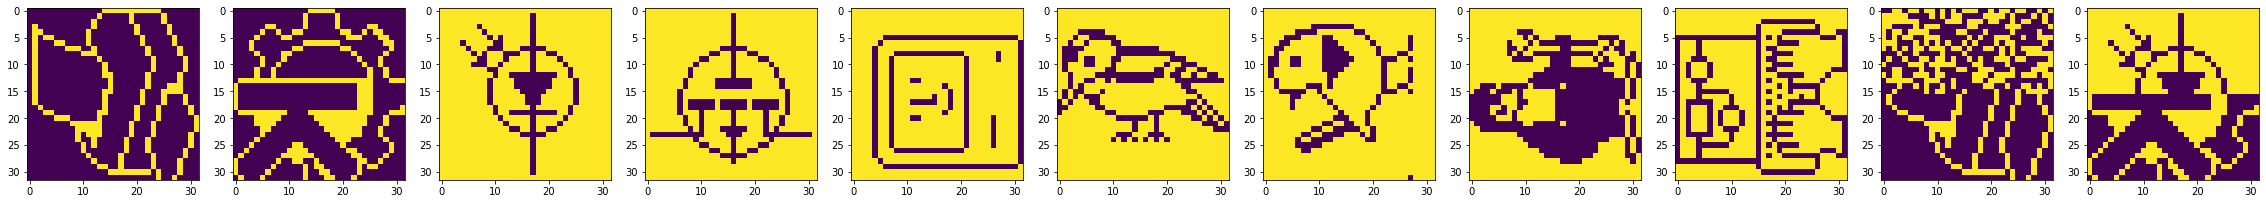

In [2]:
inputs = np.loadtxt('pict.dat', delimiter= ',' , dtype=int).reshape((11,1024))
plt.figure(figsize=(40,400))
for i in range(11):
    plt.subplot(1,11,i+1)
    plt.imshow(inputs[i].reshape((32,32)))
plt.show()

In [3]:
test = Hopfield_net(inputs[:3])

In [4]:
for i in range(3):
    print("Energy of attractor",i+1,":",test.energy(inputs[i]))
for i in range(2):
    print("Energy of distorted pattern",i+1,":" , test.energy(inputs[i+9]))

Energy of attractor 1 : -1436.390625
Energy of attractor 2 : -1362.640625
Energy of attractor 3 : -1459.25
Energy of distorted pattern 1 : -412.98046875
Energy of distorted pattern 2 : -170.5


iters: 0 




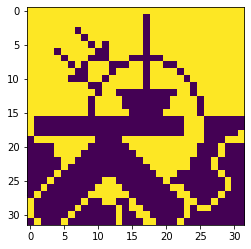

iters: 100 




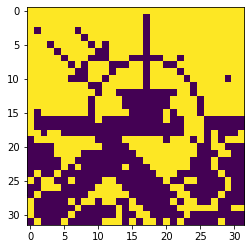

iters: 200 




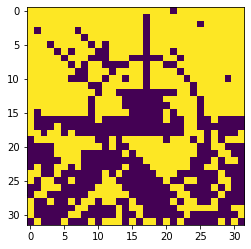

iters: 300 




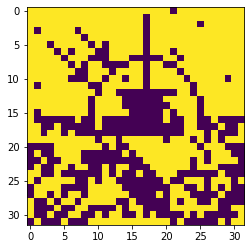

iters: 400 




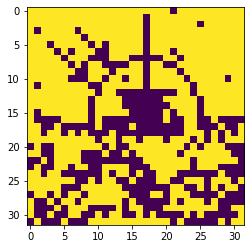

iters: 500 




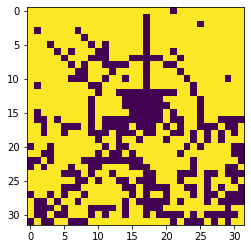

iters: 600 




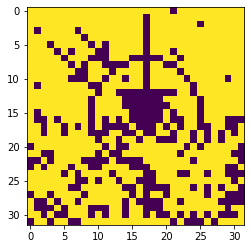

iters: 700 




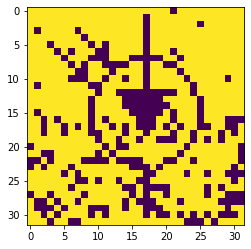

iters: 800 




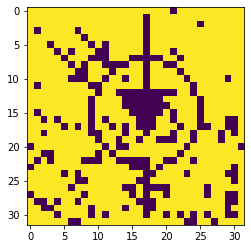

iters: 900 




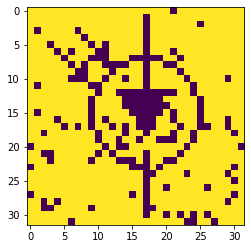

iters: 1000 




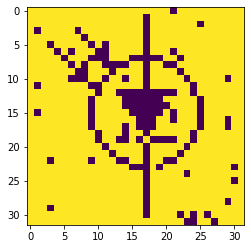

iters: 1100 




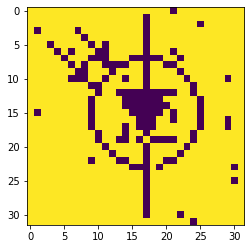

iters: 1200 




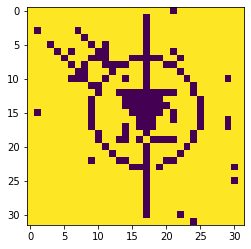

iters: 1300 




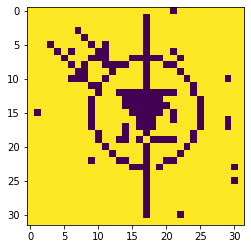

iters: 1400 




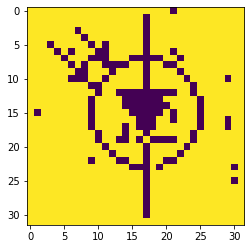

iters: 1500 




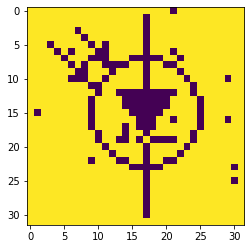

iters: 1600 




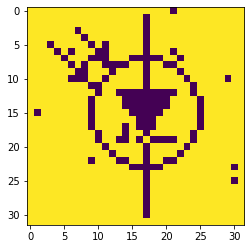

iters: 1700 




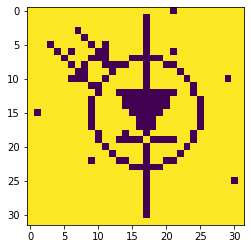

iters: 1800 




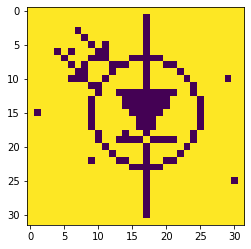

iters: 1900 




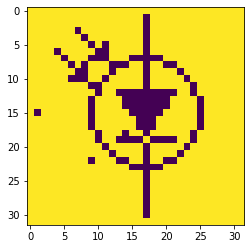

iters: 2000 




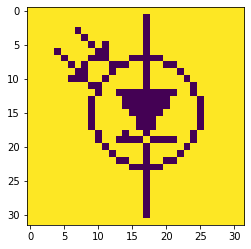

iters: 2100 




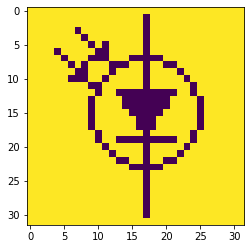

iters: 2200 




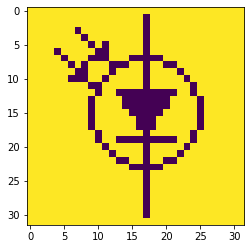

iters: 2300 




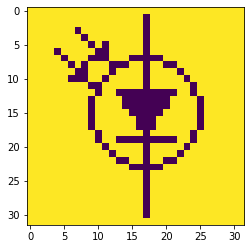

iters: 2400 




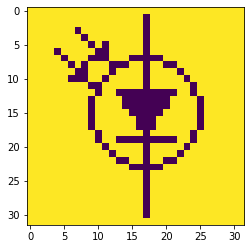

iters: 2500 




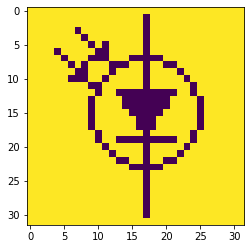

iters: 2600 




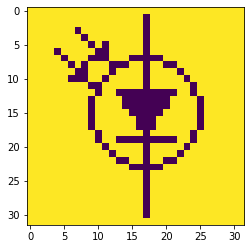

iters: 2700 




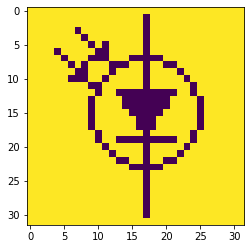

iters: 2800 




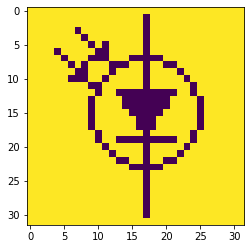

iters: 2900 




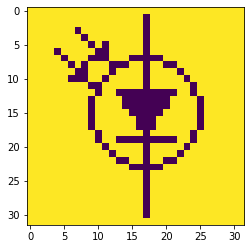

iters: 3000 




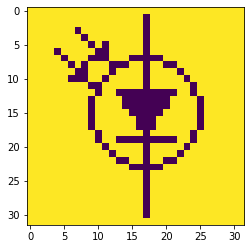

array([1, 1, 1, ..., 1, 1, 1])

In [5]:
test.predict(inputs[10],asy=True,plotiter=100,logiter=100)


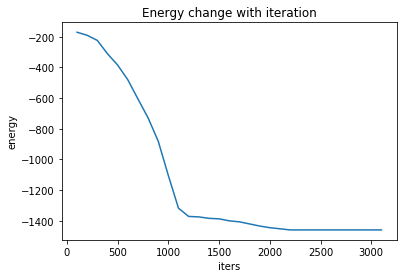

In [6]:
y=test.energy_log
x=[(i+1)*100 for i in range(len(y))]
plt.plot(x,y)
plt.xlabel("iters")
plt.ylabel("energy")
plt.title("Energy change with iteration")
plt.show()

In [7]:
W_random=np.random.normal(0,1,(1024,1024))
for i in range(1024):
    W_random[i][i]=0
state_random=np.random.normal(0,1,1024)
for i in range(len(state_random)):
    if state_random[i]>0:
        state_random[i]=1
    else: 
        state_random[i]=-1
print(state_random)    

[-1.  1.  1. ... -1. -1. -1.]


In [8]:
test.W=W_random
state=np.asarray(state_random)
test.predict(state,asy=True,iters=20000,logiter=1000,plot=False)

array([ 1., -1.,  1., ..., -1.,  1., -1.])

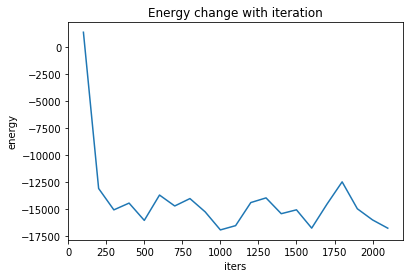

In [9]:
y=test.energy_log
x=[(i+1)*100 for i in range(len(y))]
plt.plot(x,y)
plt.xlabel("iters")
plt.ylabel("energy")
plt.title("Energy change with iteration")
plt.show()

In [ ]:
W_sym=0.5*(W_random+np.transpose(W_random))
test.W=W_sym
test.predict(state,asy=True,iters=20000,logiter=1000,plot=False)

In [ ]:
y=test.energy_log
x=[(i+1)*100 for i in range(len(y))]
plt.plot(x,y)
plt.xlabel("iters")
plt.ylabel("energy")
plt.title("Energy change with iteration")
plt.show()